In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [246]:
import pandas as pd
import get_symbols
import os, re
import pandas.io.data as web
import numpy as np

from matplotlib import pyplot as plt

In [222]:
symbolsDF = pd.read_pickle('../data/symbolsDF.pkl')


In [10]:
symbolsDF['test'] = False

In [7]:
symbolsDF.columns = ['symbols']

In [223]:
symbolsDF.head(15)

,symbols,smoothing_fns,kalman
symbols,,,
AES,AES,True,True
GAS,GAS,True,True
AEE,AEE,True,True
AEP,AEP,True,True
AWK,AWK,True,True
CNP,CNP,True,True
CMS,CMS,True,True
ED,ED,True,True
D,D,True,True


In [105]:
'smoothing_fns' not in symbolsDF.columns


False

In [22]:
symbolsDF['test']['T'] = True

/Users/liamconnell/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [20]:
symbolsDF.index = symbolsDF.symbols

In [226]:
df = pd.read_pickle('../data/data_2007-05-02_2016-04-11/GS.pkl')

In [244]:
df.shift(-1).head()

,Open,High,Low,Close,Volume,Adj Close,smooth_predict_100,smooth_slope_100,resids,test,daily_rets
Date,,,,,,,,,,,
2007-05-02,220.389999,221.929993,218.550003,221.559998,4414600,199.419681,NaN,NaN,NaN,0,0.026088
2007-05-03,222.600006,227.339996,221.429993,227.339996,5632300,204.622089,NaN,NaN,NaN,0,-0.000528
2007-05-04,227.000000,229.899994,225.600006,227.220001,4637000,204.514085,NaN,NaN,NaN,0,-0.009990
2007-05-07,225.919998,225.990005,222.960007,224.949997,4879700,202.470921,NaN,NaN,NaN,0,0.007202
2007-05-08,224.949997,227.679993,223.350006,226.570007,5195100,203.929045,NaN,NaN,NaN,0,-0.015315


In [231]:
df['daily_rets'] = (df['Adj Close'].shift(-1) - df['Adj Close']) / df['Adj Close']

In [243]:
df['test'][df['test']=='nan'] = 0

/Users/liamconnell/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


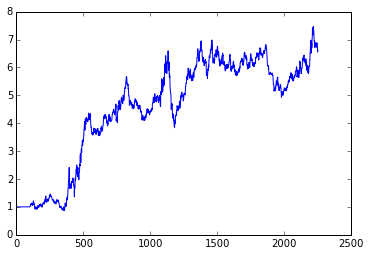

In [247]:
plot(np.cumprod(df['daily_rets']*df.test +1))

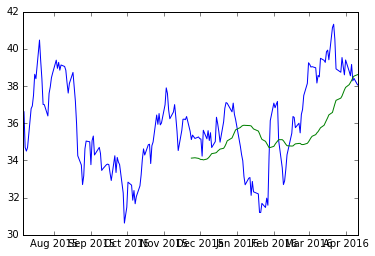

In [125]:
plot(gs.index,gs['Adj Close'])
plot(gs.index,gs.smooth_predict_100)


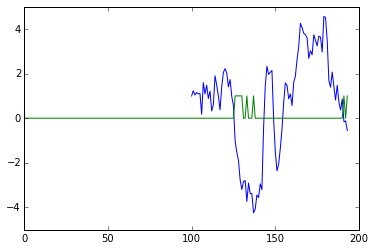

In [217]:
plot(df['resids'])
#plot((df['resids']==pd.rolling_min(df['resids'], 10)))
#plot(df['resids']<0)

plot(((df['resids']==pd.rolling_min(df['resids'], 10)).astype(int) + 
      (df['resids']<0).astype(int))==2)


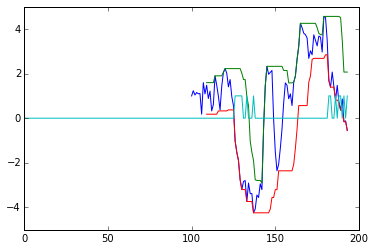

In [196]:
plot(df['resids'])
plot(pd.rolling_max(df['resids'], 10))
plot(pd.rolling_min(df['resids'], 10))
plot((df['resids']==pd.rolling_min(df['resids'], 10)) & df['resids']>0)

In [220]:
df['resids'] = df['Adj Close']-df['smooth_predict_100']
df['pos'] = ((df['resids']>0)-.5)*2
df['pos'][df['resids'].isnull()] = nan
df['pos'][((df['resids']==pd.rolling_max(df['resids'], 10)).astype(int) + 
      (df['resids']>0).astype(int))==2]=0
df['pos'][((df['resids']==pd.rolling_min(df['resids'], 10)).astype(int) + 
      (df['resids']<0).astype(int))==2]=0



/Users/liamconnell/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/liamconnell/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/liamconnell/anaconda/lib/python3.4/site-packages/IPython/kernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


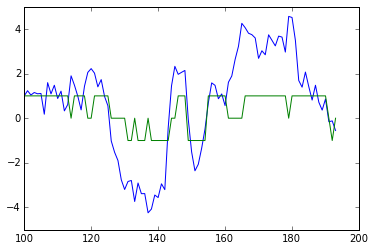

In [221]:
plot(df['resids'])
plot(df['pos'])

In [32]:
import filterpy as fp
from filterpy.kalman import predict, update

In [33]:
gs.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2007-05-02,218.000000,221.919998,217.449997,219.490005,4859500,197.556542
2007-05-03,220.389999,221.929993,218.550003,221.559998,4414600,199.419681
2007-05-04,222.600006,227.339996,221.429993,227.339996,5632300,204.622089
2007-05-07,227.000000,229.899994,225.600006,227.220001,4637000,204.514085
2007-05-08,225.919998,225.990005,222.960007,224.949997,4879700,202.470921


In [34]:
import smoothing_fns as sf

In [55]:
filtered, bs = sf.get_smooth_val(gs['Adj Close'], 100)

In [37]:
xs, cov = sf.run(data = gs)

In [80]:
cov[:,0,0]

array([  1.00000000e+03,   2.69936770e+02,   3.33027822e+01, ...,
         9.97410097e-03,   9.97846396e-03,   9.97610188e-03])

In [89]:
gs['asd'] = bs

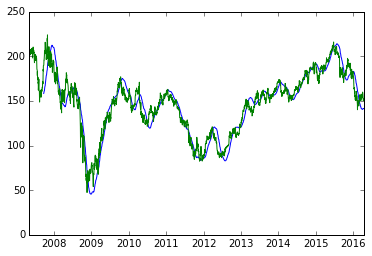

In [61]:
#plot(gs.index, xs[:,0])
plot(gs.index, filtered)
plot(gs.index,gs['Adj Close'])

In [45]:
gs['kalman_filter'] = xs[:,0]

In [46]:
gs.head()

,Open,High,Low,Close,Volume,Adj Close,kalman_filter
Date,,,,,,,
2007-05-02,218.000000,221.919998,217.449997,219.490005,4859500,197.556542,200.000000
2007-05-03,220.389999,221.929993,218.550003,221.559998,4414600,199.419681,228.975962
2007-05-04,222.600006,227.339996,221.429993,227.339996,5632300,204.622089,224.521274
2007-05-07,227.000000,229.899994,225.600006,227.220001,4637000,204.514085,230.658430
2007-05-08,225.919998,225.990005,222.960007,224.949997,4879700,202.470921,231.103076


In [66]:
gs.head().to_pickle('test')